# Analysis of Tweets for PlosONE paper

# Where are the tweets from?

In [1]:
import os
import json
import pickle
import pandas as pd
import plotly.express as px

In [31]:
# 1) Read pickles from the data/monthly_pickles folder and store their locations in a dictionary

locations = []

# 2) Create a dictionary with the countries of each tweets
countries = {'Id': [], 'country': []}


# 3) Create a dictionary with the latitudes and longitudes of the cities in Colombia
lats_longs_cities_colombia = {'Id': [], 'lat': [], 'long': [], 'address': []}

pickles_list = os.listdir('../data/monthly_pickles')
f = 0
for filename in pickles_list:
    f += 1
    if filename.endswith('.pickle'):
        df = pickle.load(open('../data/monthly_pickles/' + filename, 'rb'))
        print(f"[{f}/{len(pickles_list)}] Converting {filename} with {len(df)} rows.")
        ids = df['Id'].tolist()
        locs = df['location'].tolist()

        # Add the location to the dictionary to the corresponding id
        for i in range(len(ids)):
            try:
                # 1)
                # locations.append({ids[i]: locs[i].raw})
                
                # 2)
                countries['country'].append(locs[i].raw['display_name'].split(",")[-1].strip())
                countries['Id'].append(ids[i])
                
                # 3)
                # If the location is not a country(with ","), add the latitudes and longitudes to the list of cities
                # if ", Colombia" in locs[i].raw['display_name']:
                #     lats_longs_cities_colombia['Id'].append(ids[i])
                #     lats_longs_cities_colombia['lat'].append(locs[i].latitude)
                #     lats_longs_cities_colombia['long'].append(locs[i].longitude)
                #     lats_longs_cities_colombia['address'].append(locs[i].raw['display_name'])
            except:    
                pass

[1/76] Converting df2014-01.pickle with 1717 rows.
[2/76] Converting df2014-02.pickle with 6961 rows.
[3/76] Converting df2014-03.pickle with 2355 rows.
[4/76] Converting df2014-04.pickle with 2914 rows.
[5/76] Converting df2014-05.pickle with 1346 rows.
[6/76] Converting df2014-06.pickle with 2561 rows.
[7/76] Converting df2014-07.pickle with 3582 rows.
[8/76] Converting df2014-08.pickle with 2834 rows.
[9/76] Converting df2014-09.pickle with 5077 rows.
[10/76] Converting df2014-10.pickle with 2120 rows.
[11/76] Converting df2014-11.pickle with 2464 rows.
[12/76] Converting df2014-12.pickle with 2053 rows.
[13/76] Converting df2015-01.pickle with 2307 rows.
[14/76] Converting df2015-02.pickle with 2116 rows.
[15/76] Converting df2015-03.pickle with 2652 rows.
[16/76] Converting df2015-04.pickle with 2665 rows.
[17/76] Converting df2015-05.pickle with 4268 rows.
[18/76] Converting df2015-06.pickle with 7037 rows.
[19/76] Converting df2015-07.pickle with 2320 rows.
[20/76] Converting df

In [32]:
n_geolocation = len(countries['country'])
print(f"Number of tweets with Geolocation Activated: {n_geolocation}")
n_colombia_geolocated = pd.Series(countries['country']).value_counts()['Colombia']
print(f"Number of tweets Geolocated in Colombia: {n_colombia_geolocated}")
n_other_geolocated = n_geolocation - n_colombia_geolocated
print(f"Number of tweets  Geolocated outside Colombia: {n_other_geolocated}")

Number of tweets with Geolocation Activated: 2350485
Number of tweets Geolocated in Colombia: 353776
Number of tweets  Geolocated outside Colombia: 1996709


In [34]:
# # 1) Export the locations to a json and a csv 
# with open('../data/geolocation/locations.json', 'w') as f:
#     json.dump(locations, f)

# 2) Export the countries to a csv     
countries_df = pd.DataFrame(countries)
# countries_series = countries_df['country'].value_counts()
countries_df.to_csv('../data/geolocation/countries_df.csv')
# countries_series.to_csv('../data/geolocation/countries.csv')

# # 3) Export the lats, and longs to a csv     
# df = pd.DataFrame(lats_longs_cities_colombia)
# df.to_csv('../data/geolocation/lats_longs_cities_colombia.csv', index=False)

In [5]:
len(locations), len(lats_longs_cities_colombia['Id'])

(2350485, 285348)

In [56]:
# 4) Identify valid tweets from Colombia (API-geolocated)

# Read valid tweets
valid_tweets = pd.read_csv('../data/texts/colombian_valid_tweets.csv')

# Create a df with only the valid tweets from Colombia (API-geolocated)
countries_df['Id'] = countries_df['Id'].astype(str)
colombia_df = countries_df[countries_df['country']=='Colombia']['Id']

valid_tweets['Id'] = valid_tweets['Id'].astype(str)
df_with_valid = pd.merge(colombia_df, valid_tweets, on='Id', how='inner')[['Id']]

# Print number of tweets
n_valid_API_Colombia = len(df_with_valid)
print(f"Number of tweets  Geolocated outside Colombia: {n_valid_API_Colombia}")

Number of tweets  Geolocated outside Colombia: 207615


In [2]:
# 5) Identify proportion of retweets
# Read valid tweets
valid_tweets = pd.read_csv('../data/texts/colombian_valid_tweets.csv')
n_tweets = len(valid_tweets)
n_unique_tweets = len(valid_tweets.drop_duplicates(subset=['text']))
n_retweets = n_tweets - n_unique_tweets

print(f"Number of tweets: {n_tweets}, Number of unique tweets: {n_unique_tweets}, Number of retweets: {n_retweets}")
print(f"Proportion of retweets: {n_retweets/n_tweets}")

Number of tweets: 1664903, Number of unique tweets: 647733, Number of retweets: 1017170
Proportion of retweets: 0.610948505708741


In [11]:
# 6) Identify tone of retweets
# Read valid tweets with tone
valid_tweets = pd.read_csv('../data/texts/colombian_valid_tweets_tone_preds_wwm.csv')
unique_tweets_ids = valid_tweets.drop_duplicates(subset=['text'])['Id']
retweets = valid_tweets[~valid_tweets['Id'].isin(unique_tweets_ids)]
tone_retweets = retweets['tone'].value_counts()
tone_retweets_prop = tone_retweets/len(retweets)

In [12]:
print(tone_retweets)
print(tone_retweets_prop)

neutral     434422
negative    332439
positive    250309
Name: tone, dtype: int64
neutral     0.427089
negative    0.326827
positive    0.246084
Name: tone, dtype: float64


---

In [3]:
# read tweets with tone
tweets = pd.read_csv('../data/texts/colombian_valid_tweets_tone_preds_wwm.csv')

In [4]:
df = pd.read_csv('../data/geolocation/lats_longs_cities_colombia.csv')
lats_longs_cities_colombia = {'Id': df['Id'].tolist(), 'lat': df['lat'].tolist(), 'long': df['long'].tolist(), 'address': df['address'].tolist()}

In [5]:
df_with_depts = df.copy()

In [6]:
departments = ['Amazonas', 'Antioquia', 'Arauca', 'Atlántico', 'Bolívar', 'Boyacá', 'Caldas', 'Caquetá', 'Casanare', 'Valle del Cauca', 'Cauca', 'Cesar', 'Chocó', 'Córdoba', 'Cundinamarca', 'Guainía', 'Guaviare', 'Huila', 'La Guajira', 'Magdalena', 'Meta', 'Nariño', 'Norte de Santander', 'Putumayo', 'Quindío', 'Risaralda', 'San Andrés y Providencia', 'Santander', 'Sucre', 'Tolima', 'Vaupés', 'Vichada', 'Bogotá Distrito Capital']
for index, row in df_with_depts.iterrows():
    if "Valledupar" in row['address']:
        df_with_depts.loc[index, 'department'] = 'Cesar'
    else:
        for department in departments:
            if department in row['address']:
                df_with_depts.loc[index, 'department'] = department
                break
            
df_with_depts.to_csv('../data/geolocation/lats_longs_cities_colombia_with_depts.csv', index=False)

In [7]:
df_with_depts['department'].value_counts()

Bogotá Distrito Capital     135834
Antioquia                    33450
Valle del Cauca              20252
Atlántico                    18276
Santander                    12770
Norte de Santander           10060
Bolívar                       6210
Magdalena                     4563
Cesar                         4454
Risaralda                     4446
Cundinamarca                  3906
Tolima                        3767
Córdoba                       3232
Meta                          3212
Boyacá                        3112
La Guajira                    3016
Caldas                        2308
Nariño                        2186
Quindío                       1851
Casanare                      1491
Huila                         1411
Cauca                         1307
Sucre                         1038
Arauca                         754
Chocó                          321
Amazonas                       308
Caquetá                        261
Putumayo                       219
Guaviare            

In [140]:
df_with_tone = pd.merge(df_with_depts, tweets, on='Id', how='inner')[['Id', 'lat', 'long', 'address', 'department', 'tone', 'date']]

In [70]:
# use a sample of the data of 1000 rows

# filter to only have the tweets with tone positive
df_with_tone_sample = df_with_tone[df_with_tone['tone'] == 'positive']

# filter to only have the tweets in specific years
df_with_tone_sample = df_with_tone_sample[df_with_tone_sample['date'].str[:4].isin(['2016'])]

# df_with_tone_sample = df_with_tone_sample.sample(1000)

In [71]:
# Drop rows not from Colombia
for  i in df_with_tone_sample["address"]:
    if i.split(",")[-1] != " Colombia":
        df_with_tone_sample = df_with_tone_sample[df_with_tone_sample["address"] != i]
        


In [72]:
import nbformat

color_mapping = {
    'positive': 'blue',
    'neutral': 'gray',
    'negative': 'red'
}

# Create scatter map
fig = px.scatter_geo(df_with_tone_sample, lat='lat', lon='long',color = 'tone', color_discrete_map=color_mapping,
                     title='Tonality of Tweets in Colombia')

fig.update_traces(marker=dict(opacity=0.1))

# Show country boundaries
fig.update_geos(showcoastlines=True, coastlinecolor="black",
                showland=True, landcolor="lightgray",
                showcountries=True, countrycolor="black")

fig.update_geos(fitbounds="locations") 
fig.show()

In [168]:
dep = 'Santander'
# Create a line plot of the proportion of positive, neutral and negative tweets over time on Bogotá
df_with_tone_sample = df_with_tone
df_with_tone_sample['date'] = pd.to_datetime(df_with_tone_sample['date'])
df_with_tone_sample['month'] = df_with_tone_sample['date'].dt.to_period('M')
df_with_tone_sample['year'] = df_with_tone_sample['date'].dt.to_period('Y')

df_with_tone_sample = df_with_tone_sample[df_with_tone_sample['department'] == dep]
df_with_tone_sample = df_with_tone_sample.groupby(['year', 'month', 'tone']).size().reset_index(name='count')
df_with_tone_sample = df_with_tone_sample.pivot_table(index=['year', 'month'], columns='tone', values='count').reset_index()
df_with_tone_sample = df_with_tone_sample.fillna(0)

df_with_tone_sample['total'] = df_with_tone_sample['negative'] + df_with_tone_sample['neutral'] + df_with_tone_sample['positive']

df_with_tone_sample['negative'] = df_with_tone_sample['negative']/df_with_tone_sample['total']
df_with_tone_sample['neutral'] = df_with_tone_sample['neutral']/df_with_tone_sample['total']
df_with_tone_sample['positive'] = df_with_tone_sample['positive']/df_with_tone_sample['total']

df_with_tone_sample = df_with_tone_sample.drop(columns=['total'])
df_with_tone_sample = df_with_tone_sample.drop(columns=['neutral'])
df_with_tone_sample = df_with_tone_sample.drop(columns=['positive'])

df_with_tone_sample = df_with_tone_sample.melt(id_vars=['year', 'month'], var_name='tone', value_name='proportion')
df_with_tone_sample['month'] = df_with_tone_sample['month'].astype(str)

color_mapping = {
    'positive': 'blue',
    'neutral': 'gray',
    'negative': 'red'
}

fig = px.line(df_with_tone_sample, x='month', y='proportion', color='tone', line_group='year', title=f'Proportion of Positive, Neutral and Negative Tweets in {dep} over time', color_discrete_map=color_mapping)

fig.show()


In [169]:
df_with_tone_sample.to_excel(f'../docs/graphs/tone_{dep}.xlsx', index=False)

In [196]:
# plot proportion of negative tone tweets in each department (heatmap)
df_with_tone_sample = df_with_tone[df_with_tone['date'].astype(str).str[:4].isin(['2016'])]

df_with_tone_sample = df_with_tone_sample.groupby(['department', 'tone']).size().reset_index(name='count')
df_with_tone_sample = df_with_tone_sample.pivot_table(index='department', columns='tone', values='count').reset_index()

df_with_tone_sample['total'] = df_with_tone_sample['negative'] + df_with_tone_sample['neutral'] + df_with_tone_sample['positive']

df_with_tone_sample['negative'] = df_with_tone_sample['negative']/df_with_tone_sample['total']


df_with_tone_sample = df_with_tone_sample.drop(columns=['total'])
df_with_tone_sample = df_with_tone_sample.drop(columns=['neutral'])
df_with_tone_sample = df_with_tone_sample.drop(columns=['positive'])


df_with_tone_sample = df_with_tone_sample.melt(id_vars=['department'], var_name='negative', value_name='proportion')

# create a heatmap
fig = px.bar(df_with_tone_sample, x='department', y='proportion', color='proportion', title='Proportion of Negative Tone Tweets in each Department (2014)')

fig.show()

In [197]:
df_with_tone_sample['proportion'] = df_with_tone_sample['proportion']*100

In [198]:
df_with_tone_sample

,department,negative,proportion
0,Amazonas,negative,NaN
1,Antioquia,negative,49.456522
2,Arauca,negative,NaN
3,Atlántico,negative,39.589443
4,Bogotá Distrito Capital,negative,41.386667
5,Bolívar,negative,41.237113
6,Boyacá,negative,50.000000
7,Caldas,negative,59.090909
8,Caquetá,negative,41.666667
9,Casanare,negative,60.714286


In [136]:
# run correlation between tone and lat, long
df_with_tone_sample =df_with_tone
df_with_tone_sample['lat'] = df_with_tone_sample['lat'].astype(float)
df_with_tone_sample['long'] = df_with_tone_sample['long'].astype(float)

# map tone to a number
df_with_tone_sample['tone'] = df_with_tone_sample['tone'].map({'positive': 1, 'neutral': 0, 'negative': -1})

df_with_tone_sample.corr()


C:\Users\jmart130\AppData\Local\Temp\ipykernel_8488\171247494.py:9: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Id,lat,long,tone
Id,1.000000,-0.063881,-0.029691,0.002687
lat,-0.063881,1.000000,0.120861,0.014530
long,-0.029691,0.120861,1.000000,0.016174
tone,0.002687,0.014530,0.016174,1.000000


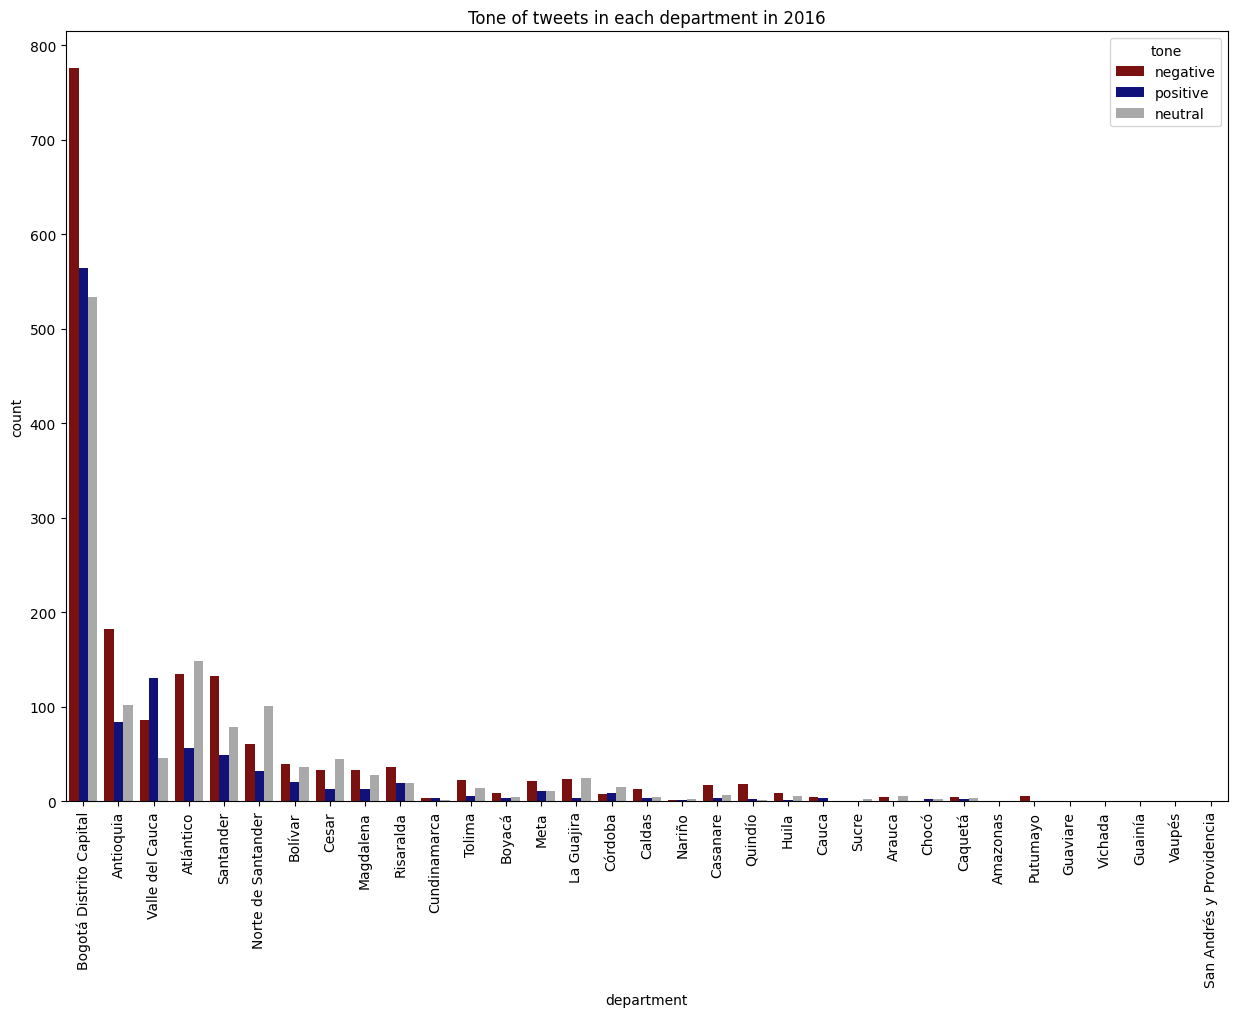

In [19]:
# stacked plot the tone based on the department, using a proportion of the total number of tweets in each department. Do this for 2016, 2018, and 2020 
import matplotlib.pyplot as plt
import seaborn as sns

# 2016
plt.figure(figsize=(15, 10))
plt.title('Tone of tweets in each department in 2016')

# use colors dark red for negative, dark blue for positive, and dark grey for neutral
sns.countplot(data=df_with_tone[df_with_tone['date'].str.contains('2016')], x='department', hue='tone', order=df_with_tone['department'].value_counts().index, palette={'negative': 'darkred', 'positive': 'darkblue', 'neutral': 'darkgrey'}, hue_order=['negative', 'positive', 'neutral'])

plt.xticks(rotation=90)
plt.show()


In [213]:
from ratelimiter import RateLimiter
from geopy.geocoders import Nominatim
geocoder = RateLimiter(period=1/60, max_calls=1)(Nominatim(user_agent='tweets_project').geocode)
geocoder("Chios")

Location(Χίος, Περιφερειακή Ενότητα Χίου, Περιφέρεια Βόρειου Αιγαίου, Αποκεντρωμένη Διοίκηση Αιγαίου, Ελλάς, (38.37581315, 26.064655246170453, 0.0))

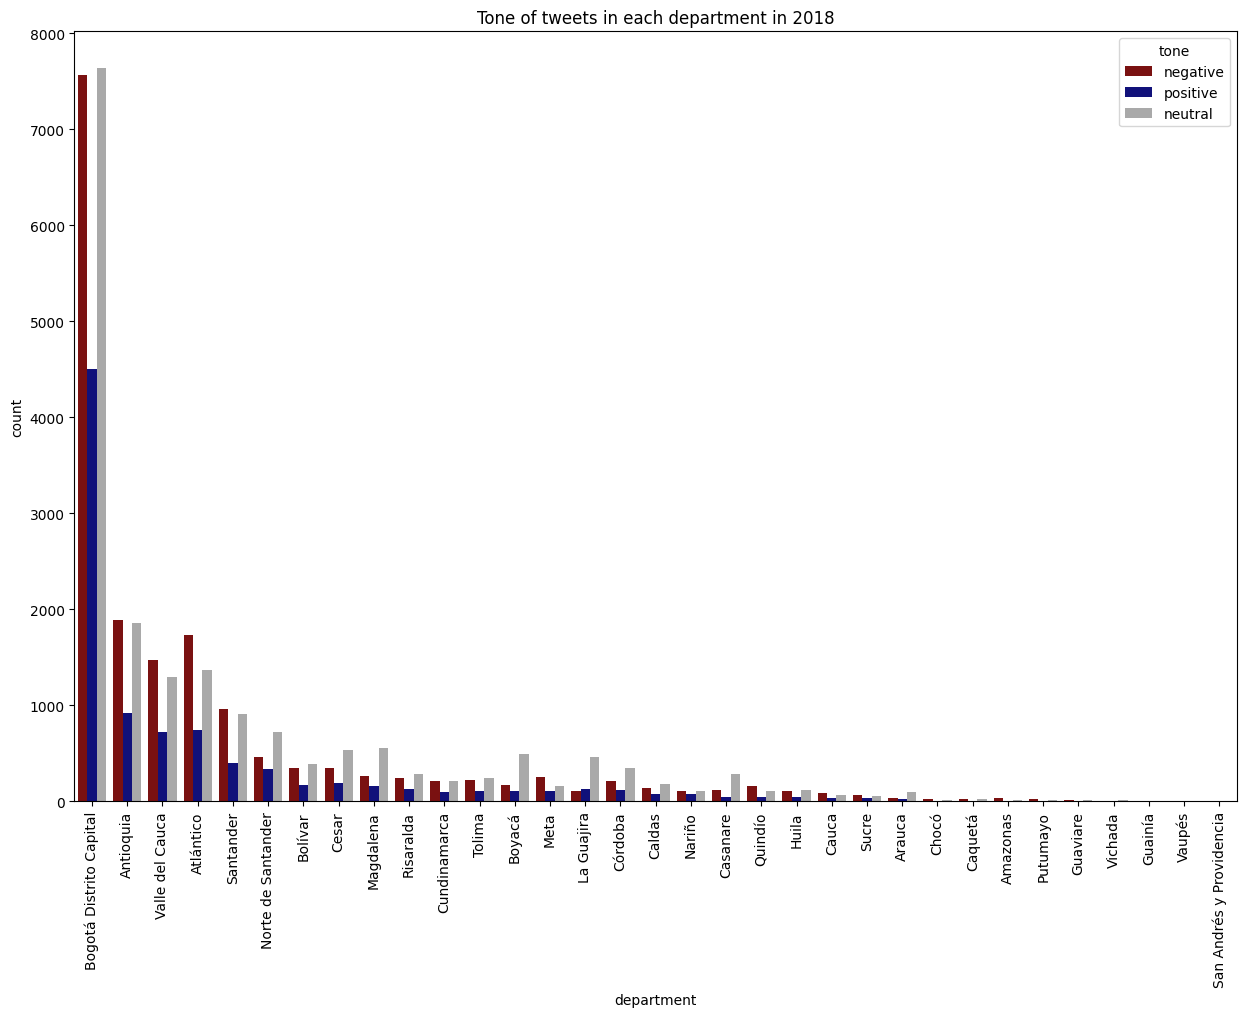

In [20]:
# stacked plot the tone based on the department, using a proportion of the total number of tweets in each department. Do this for 2016, 2018, and 2020 
import matplotlib.pyplot as plt
import seaborn as sns

# 2018
plt.figure(figsize=(15, 10))
plt.title('Tone of tweets in each department in 2018')

# use colors dark red for negative, dark blue for positive, and dark grey for neutral
sns.countplot(data=df_with_tone[df_with_tone['date'].str.contains('2018')], x='department', hue='tone', order=df_with_tone['department'].value_counts().index, palette={'negative': 'darkred', 'positive': 'darkblue', 'neutral': 'darkgrey'}, hue_order=['negative', 'positive', 'neutral'])

plt.xticks(rotation=90)
plt.show()


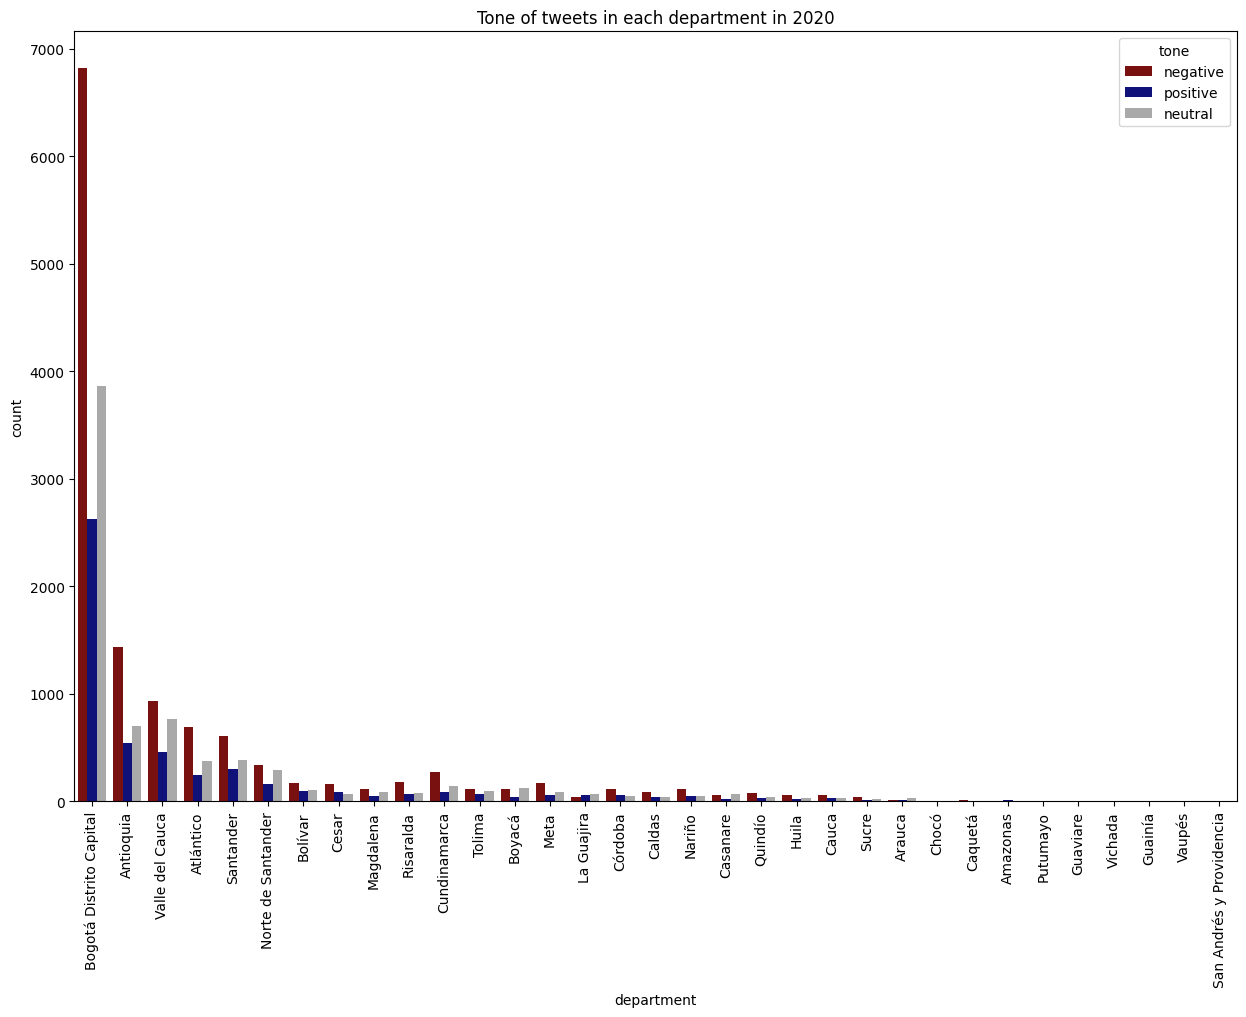

In [21]:
# stacked plot the tone based on the department, using a proportion of the total number of tweets in each department. Do this for 2016, 2018, and 2020 
import matplotlib.pyplot as plt
import seaborn as sns

# 2020
plt.figure(figsize=(15, 10))
plt.title('Tone of tweets in each department in 2020')

# use colors dark red for negative, dark blue for positive, and dark grey for neutral
sns.countplot(data=df_with_tone[df_with_tone['date'].str.contains('2020')], x='department', hue='tone', order=df_with_tone['department'].value_counts().index, palette={'negative': 'darkred', 'positive': 'darkblue', 'neutral': 'darkgrey'}, hue_order=['negative', 'positive', 'neutral'])

plt.xticks(rotation=90)
plt.show()


In [47]:
df_with_tone.plot( kind='bar', stacked=True, color=['red', 'skyblue', 'green'])

KeyboardInterrupt: 

In [7]:
# plot the locations in a map (withing Colombia) with markers based on the number of tweets
import folium

# Create a map centered in Colombia
m = folium.Map(location=[4.5709, -74.2973], zoom_start=6)

# Add markers to the map
for i in range(len(lats_longs_cities_colombia['Id']))[0:10000]:
    folium.Marker(
        location=[lats_longs_cities_colombia['lat'][i], lats_longs_cities_colombia['long'][i]],
        icon=folium.Icon(icon='cloud')
    ).add_to(m)
    
m.save('../data/geolocation/map.html')


In [34]:
# plot the locations in a map (withing Colombia) with a heatmap
import folium
from folium.plugins import HeatMap

gradient = {.33: 'yellow', .66: 'red', 1: 'black'}

m = folium.Map(location=[4.5709, -74.2973], zoom_start=6)
# folium.TileLayer('statementoner', attr="toner").add_to(m)
HeatMap(data=df[['lat', 'long']], radius=10, gradient=gradient).add_to(m)
folium.LayerControl().add_to(m)
m.save('../data/geolocation/lats_longs_cities_colombia_heatmap2.html')


In [ ]:
m

In [ ]:
# save the map as a png
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

chrome_options = Options()
chrome_options.add_argument("--headless")
driver = webdriver.Chrome(options=chrome_options)
driver.get('../data/geolocation/lats_longs_cities_colombia_heatmap2.html')
driver.save_screenshot('../data/geolocation/lats_longs_cities_colombia_heatmap2.png')
driver.quit()


In [9]:
tweets


,Id,date,referred_to,text,tone
0,429475247448793088,2014-01-01,migrants,aluxtuitea rogeliosamour JJRENDON JNatanVaquiz...,negative
1,429443798234824704,2014-01-01,migrants,Mayomendozaf callollanos JanioCuadro el que no...,negative
2,429435589205585920,2014-01-01,migrants,Recuerdos de mis bellos sobrino Venecos,positive
3,429401602966171649,2014-01-01,government,"SienMisManosEstuviera Cerraría la frontera, de...",negative
4,429394529024622592,2014-01-01,geopolitics,ACUATheragram ACUATheragram Es URIBE O SINO N...,positive
...,...,...,...,...,...
1664898,1531865786754682880,2022-06-01,migrants,miremejias Y se olvidan del sector de La Maris...,negative
1664899,1531865341399375875,2022-06-01,migrants,Veneco nivel,neutral
1664900,1531863973582327808,2022-06-01,migrants,"Si no nos matan los venecos, nos mata el escap...",negative
1664901,1531863579875581953,2022-06-01,migrants,Me encanta ver venecos de trending y cómo nos ...,positive
